In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from cosmojo.universe import *

%load_ext line_profiler


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
cosmo = Cosmo()
cosmo_nl = Cosmo(nonlinear=1)


In [5]:
k = np.logspace(-3,1)

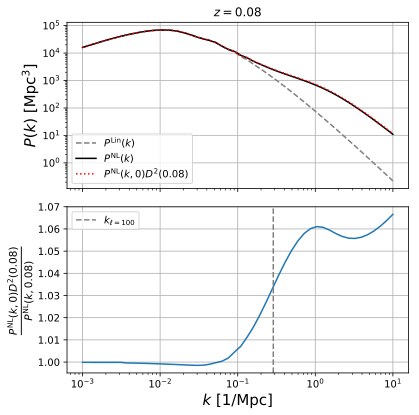

In [6]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(6,6))
ax1.set_title(r'$z=0.08$')
ax1.loglog(k, cosmo.pkz.P(0.08,k), '--', color='grey', label=r'$P^{\rm Lin}(k)$')
ax1.loglog(k, cosmo_nl.pkz.P(0.08,k), label=r'$P^{\rm NL}(k)$', color='k')
ax1.loglog(k, cosmo_nl.pkz.P(0.0,k)*cosmo_nl.D_z_norm(0.08)**2, label=r'$P^{\rm NL}(k,0)D^2(0.08)$', ls=':', color='r')
ax1.set_ylabel(r'$P(k)$ [Mpc$^3$]',size=15)
ax1.grid()
ax1.legend()
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

ax2.semilogx(k, cosmo_nl.pkz.P(0.0,k)*cosmo_nl.D_z_norm(0.08)**2/cosmo_nl.pkz.P(0.08,k), ls='-')
ax2.set_ylabel(r'$\frac{P^{\rm NL}(k,0)D^2(0.08)}{P^{\rm NL}(k,0.08)}$',size=15)
ax2.set_xlabel(r'$k$ [1/Mpc]',size=15)
ax2.grid()
ax2.axvline(100./cosmo.f_K(0.08), color='grey', ls='--', label=r'$k_{\ell=100}$')
ax2.legend()

plt.tight_layout()
# plt.savefig('/Users/fbianchini/Research/2MPZ/plots/Pkz_check.pdf')